## Predicting Startup Profits

This notebook contains an exmple of using backward elimination to select which of a set of variables best predict the profits of startups.

As there are multiple predictors variables and the dependent variable is a continuous value (profit), a multiple linear regression method is suitable. 

This is a relatively small data set with only 50 entries. The contents of this notebook were produced as a learning experience.

## Import the Modules

In [1]:
from sklearn import linear_model
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sns
import statsmodels.api as sm

## Load the Dataset

In [2]:
raw_data = pd.read_csv('data\startup_profits.csv')

In [3]:
raw_data.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,California,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,California,166187.94


In [21]:
raw_data.shape

(50, 5)

In [5]:
model_data.isnull().sum()

R&D Spend           0
Administration      0
Marketing Spend     0
Profit              0
State_California    0
State_New York      0
dtype: int64

There are no empty values in the data set :)

### Data Iincluded in the Dataset

The data in the columns is relatively straight-forward<br>
* **R&D Spend** - The amount spent on R&D <br>
* **Administraion** The amount spent on admin and operational costs <br>
* **Marketing Spend** The amount spent on Marketing <br>
* **State** The state in which the startup operates. This categorical variable will need to be split into dummy variables.<br>
* **Profit** The total profit made by the startup. This will be the dependent variable. <br>

The State colmun is a categorical variable, which cannot be assessed numerically. It must be converted into a dummy variable before it can be included in the regression analysis.

This analysis will use California as the default state, and check for the effect of moving the startup to New York. It is important not to include all the dummy variables in the model to avoid falling into the dummy variable trap.

### Exploratory Analysis

Begin by having a quick look at the data to see if there are any anomolies and what results we can sensibly expect before making the model.

In [4]:
model_data = pd.get_dummies(raw_data)
model_data.head()

,R&D Spend,Administration,Marketing Spend,Profit,State_California,State_New York
0,165349.20,136897.80,471784.10,192261.83,0,1
1,162597.70,151377.59,443898.53,191792.06,1,0
2,153441.51,101145.55,407934.54,191050.39,1,0
3,144372.41,118671.85,383199.62,182901.99,0,1
4,142107.34,91391.77,366168.42,166187.94,1,0


<AxesSubplot:>

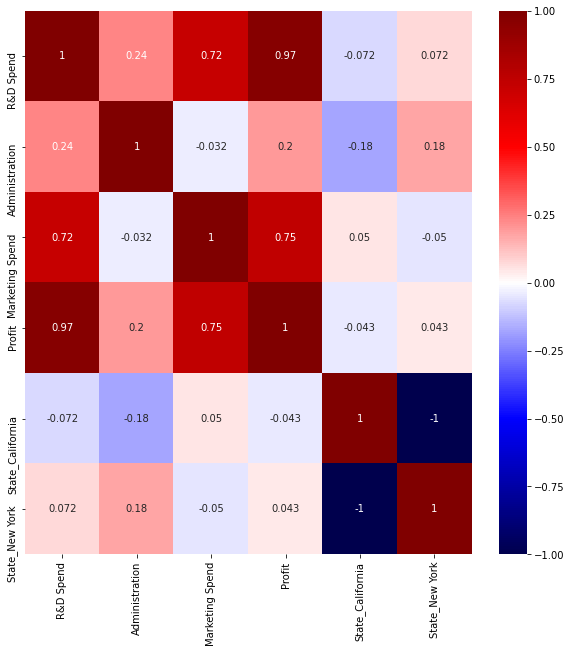

In [6]:
plt.figure(figsize=(10, 10))
sns.heatmap(model_data.corr(), cmap = 'seismic', annot=True)

This heatmap clearly shows that R&D spend and marketing spend are strongly correlated with the startup profits in this dataset, and the influcence of location appears to be minimal. It will be seen in the regression analysis whether administration spending has a significant enough impact to warrant including in the model.

You can also see that the startup that there is a strong correlation between marketing spend and R&D spend in startups.

Each variable is plotted against profit below:

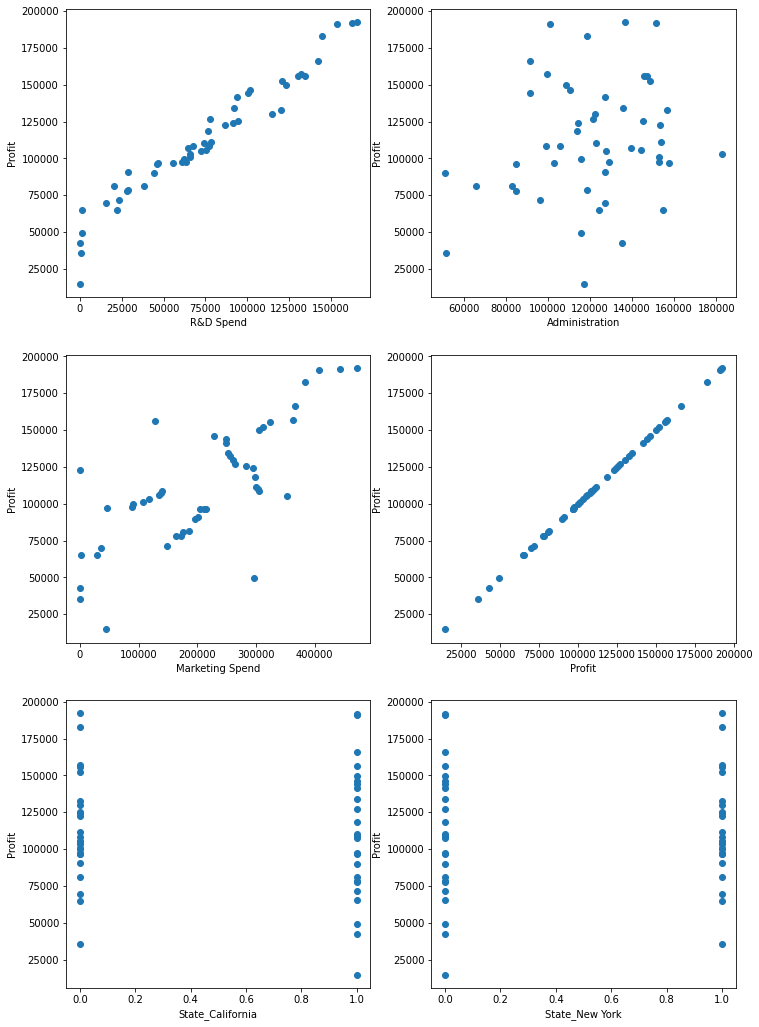

In [7]:
plt.figure(figsize=(12, 18))
# fig, ax = plt.subplots(3, 2)
for i in range(1, 7):
    plt.subplot(3, 2, i)
    plt.scatter(model_data.iloc[:, i-1], model_data['Profit'])
    plt.ylabel('Profit')
    plt.xlabel( model_data.columns[i-1])

Just out of interest, this plot shows the correlation between marketing spend and R&D spend in the startups. 

Text(0, 0.5, 'Profit')

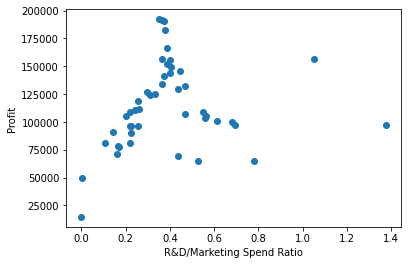

In [25]:
rm_ratio = model_data['R&D Spend']/model_data['Marketing Spend']
plt.scatter(rm_ratio,raw_data['Profit'])
plt.xlabel('R&D/Marketing Spend Ratio')
plt.ylabel('Profit')

In [9]:
model_data.head()

,R&D Spend,Administration,Marketing Spend,Profit,State_California,State_New York
0,165349.20,136897.80,471784.10,192261.83,0,1
1,162597.70,151377.59,443898.53,191792.06,1,0
2,153441.51,101145.55,407934.54,191050.39,1,0
3,144372.41,118671.85,383199.62,182901.99,0,1
4,142107.34,91391.77,366168.42,166187.94,1,0


#### Setting up the statsmodels OLS regression

Making sure to exclude one of the dummy variables (in this case 'State_New York') to avoid falling into the dummy variable trap. Without excluding one of the dummy variables, the model will be unable to distinguish between the effects of the state variables as they are multicollinear.

These regressions will be analysed with the standard significance level of 5%.

In [10]:
model_data.set_index('Profit')
x = sm.add_constant(model_data.loc[:, 'R&D Spend' : 'State_California'])
y = x['Profit']
x= x.drop(labels='Profit', axis='columns')

In [11]:
reg = sm.OLS(y,x).fit()

In [12]:
reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.947
Method:                 Least Squares   F-statistic:                     218.4
Date:                Wed, 27 Jan 2021   Prob (F-statistic):           7.53e-29
Time:                        13:31:35   Log-Likelihood:                -525.25
No. Observations:                  50   AIC:                             1060.
Df Residuals:                      45   BIC:                             1070.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const             4.908e+04   6950.471      7.062      0.000    3.51e+04    6.31e+04
R&D Spend            0.8080      0.046     17.662      0.000       0.716       0.900
Administration      -0.0236      0.052     -0.455      0.651      -0.128       0.081
Marketing Spend      0.0264      0.017      1.581      0.121      -0.007       0.060
State_California  1332.0930   2690.180      0.495      0.623   -4086.207    6750.393
==============================================================================
Omnibus:                       15.851   Durbin-Watson:                   1.306
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               25.631
Skew:                          -0.951   Prob(JB):                     2.72e-06
Kurtosis:                       5.947   Cond. No.                     1.48e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.48e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

As we can see from the P>|t| column, the p-value of the administration spend is the highest. i.e. under the null hypotheses that each variable has no significant influence on profit, it is most likely that the null hypothesis for administration is true.  

Now running a backwards eliminiation, remove adminstration from the variables and re-run the regression. Continue removing any variables with a p-value <0.05 until there are no more such variables (or until the adj. R squared begins to increase).

In [13]:
x= x.drop(labels='Administration', axis='columns')
reg = sm.OLS(y,x).fit()

In [14]:
reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                     296.2
Date:                Wed, 27 Jan 2021   Prob (F-statistic):           4.44e-30
Time:                        13:31:35   Log-Likelihood:                -525.36
No. Observations:                  50   AIC:                             1059.
Df Residuals:                      46   BIC:                             1066.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const             4.624e+04   3012.705     15.347      0.000    4.02e+04    5.23e+04
R&D Spend            0.8003      0.042     18.976      0.000       0.715       0.885
Marketing Spend      0.0286      0.016      1.809      0.077      -0.003       0.060
State_California  1484.6097   2646.166      0.561      0.577   -3841.846    6811.065
==============================================================================
Omnibus:                       15.844   Durbin-Watson:                   1.291
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               25.957
Skew:                          -0.943   Prob(JB):                     2.31e-06
Kurtosis:                       5.984   Cond. No.                     6.71e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.71e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Continung the backward elimination, the next varaible to be removed is the state.

In [15]:
x= x.drop(labels='State_California', axis='columns')
reg = sm.OLS(y,x).fit()

In [16]:
reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.950
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                     450.8
Date:                Wed, 27 Jan 2021   Prob (F-statistic):           2.16e-31
Time:                        13:32:59   Log-Likelihood:                -525.54
No. Observations:                  50   AIC:                             1057.
Df Residuals:                      47   BIC:                             1063.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            4.698e+04   2689.933     17.464      0.000    4.16e+04    5.24e+04
R&D Spend           0.7966      0.041     19.266      0.000       0.713       0.880
Marketing Spend     0.0299      0.016      1.927      0.060      -0.001       0.061
==============================================================================
Omnibus:                       14.677   Durbin-Watson:                   1.257
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.161
Skew:                          -0.939   Prob(JB):                     2.54e-05
Kurtosis:                       5.575   Cond. No.                     5.32e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.32e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

According to the p-values from this regression, marketing spend should be excluded from the regression as the p-value is higher than the selected significance level of 0.05.

However, this value is very close to our significance level and the initial data exploration above showed a correlation between marketing spend and startup profit. This aligns with the common sense expectation that comapnies that spend more on marketing generally generate more profit.

It is worth investigating whether deviating from the selected sognificance level is a good idea here by removing the marketing spend variable and checking if the adjusted r-squared decreases, suggesting that the model actually worsens when not considering marketing spend.

In [17]:
x= x.drop(labels='Marketing Spend', axis='columns')
reg = sm.OLS(y,x).fit()

In [19]:
reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.947
Model:                            OLS   Adj. R-squared:                  0.945
Method:                 Least Squares   F-statistic:                     849.8
Date:                Wed, 27 Jan 2021   Prob (F-statistic):           3.50e-32
Time:                        13:52:35   Log-Likelihood:                -527.44
No. Observations:                  50   AIC:                             1059.
Df Residuals:                      48   BIC:                             1063.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       4.903e+04   2537.897     19.320      0.000    4.39e+04    5.41e+04
R&D Spend      0.8543      0.029     29.151      0.000       0.795       0.913
==============================================================================
Omnibus:                       13.727   Durbin-Watson:                   1.116
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               18.536
Skew:                          -0.911   Prob(JB):                     9.44e-05
Kurtosis:                       5.361   Cond. No.                     1.65e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.65e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

As the adjusted r-squared value has decreased after removing marketing spend, the fit of the model has worsened, suggesting that it is a bad idea to remove marketing spend.

It's probably a good idea here to bend the rules and keep the marketing spend.

The final model that best predicts the profits of the startup businesses in this dataset is therefore the penultimate model that includes the marketing spend.